### K Nearest Neighbors

In [2]:
# Load the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plta
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline


In [4]:
## load the data set

dataset = pd.read_csv("C:\\Users\\Hi\\Downloads\\Classified Data",index_col = 0)

In [5]:
dataset

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
dataset.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [8]:
dataset['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [9]:
## split the data into x and y

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [10]:
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [11]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [12]:
## split the data into train and test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [13]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 10) (250, 10) (750,) (250,)


In [16]:
## Building a model

from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [21]:
# select the best k value to deide "n-neighbors" basis eeror rate

error_rate =[]

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))
    

In [22]:
error_rate

[0.076,
 0.084,
 0.06,
 0.064,
 0.064,
 0.06,
 0.048,
 0.048,
 0.044,
 0.044,
 0.048,
 0.044,
 0.044,
 0.04,
 0.04,
 0.04,
 0.04,
 0.044,
 0.044,
 0.048,
 0.044,
 0.056,
 0.044,
 0.048,
 0.044,
 0.044,
 0.036,
 0.036,
 0.036]

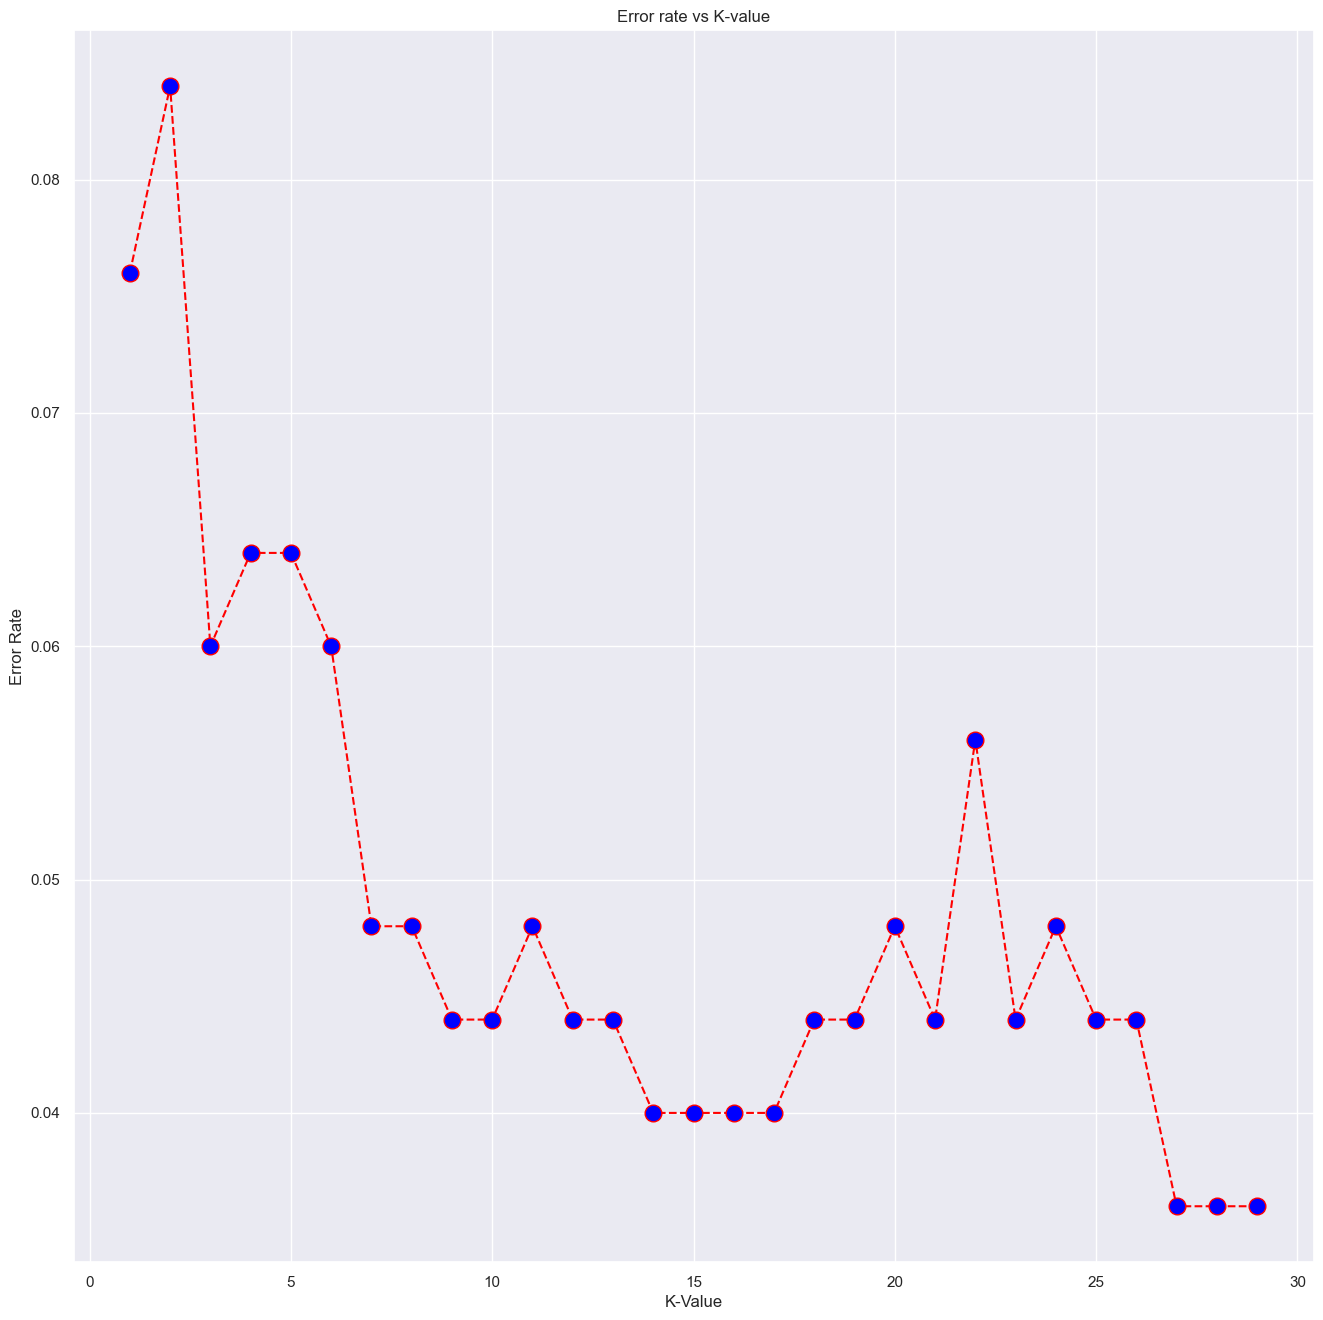

In [23]:
plt.figure(figsize =(16,16))
plt.plot(range(1,30), error_rate,color = 'red',linestyle = 'dashed',marker='o',markersize=12,markerfacecolor='blue')
plt.title("Error rate vs K-value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(x_train,y_train)
  

In [26]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [27]:
## Evaluate the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
print(confusion_matrix(y_train,y_pred_train ))
print(confusion_matrix(y_test,y_pred_test ))

[[332  34]
 [ 13 371]]
[[129   5]
 [  4 112]]


In [29]:
print(classification_report(y_train,y_pred_train ))
print(classification_report(y_test,y_pred_test ))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       366
           1       0.92      0.97      0.94       384

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       134
           1       0.96      0.97      0.96       116

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [31]:
print("Traing accuracy:",accuracy_score(y_train,y_pred_train ))
print("Test accuracy:",(y_test,y_pred_test ))

Traing accuracy: 0.9373333333333334
Test accuracy: (545    0
298    0
109    0
837    0
194    0
      ..
971    0
267    1
772    0
172    0
491    1
Name: TARGET CLASS, Length: 250, dtype: int64, array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,

                                             ****END****